In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from csv import reader
import pandas as pd 
data = pd.read_csv('2023-Nov-ACOSUSData-Complete.csv')
file = open('2023-Nov-ACOSUSData-Complete.csv', encoding="utf8")

[27, 25, 37, 32, 30, 25, 38, 25, 27, 22, 24, 24, 28, 22, 20, 24, 25, 31, 23, 20, 22, 23, 21, 28, 23, 18, 22, 26, 21, 25, 21, 24, 29, 21, 25, 31, 33, 23, 49, 28, 36, 31, 24, 21, 43, 34, 34, 26, 23, 24, 20, 23, 29, 23, 34, 35, 19, 33, 28, 24, 21, 23, 29, 22, 21, 21, 21, 22, 27, 22, 21, 20, 26, 22, 27, 47, 24, 18, 24, 21, 34, 27, 23, 20, 22, 20, 22, 20, 23, 20, 21, 34, 20, 43, 22, 37, 23, 22, 26, 23, 30, 21, 20, 21, 23, 21, 23, 20, 18, 31, 26, 28, 22, 23, 35, 19, 31, 24, 20, 19, 18, 36, 23, 18, 23, 23, 38, 21, 20, 22, 27, 18, 22, 18, 31, 51, 23, 31, 20, 24, 20, 19, 29, 37, 30, 31, 22, 21, 23, 27, 21, 24, 26, 31, 26, 21, 19, 23, 30, 22]

the oldest:  51
the youngest:  18
average age:  25.44375
standard deviation:  6.227093242562885


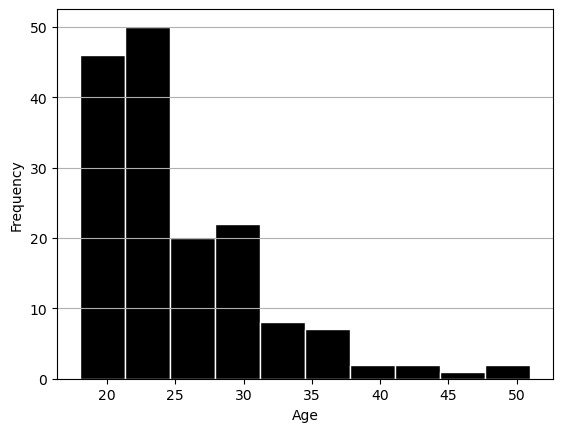

In [2]:
#not using pandas but csv reader
csv_reader = reader(file)
age = []
row_index = 23
for row in csv_reader:
    age.append(row[row_index])
cleaned_age = age[3:]
new_age = []
for num in cleaned_age:
    newNum = int(num)
    new_age.append(newNum)
print(new_age)
print()
print("the oldest: ", max(new_age))
print("the youngest: ", min(new_age))
print("average age: ", sum(new_age)/len(new_age))
pan = pd.Series(new_age)
print("standard deviation: ", pan.std())

plt.hist(new_age, bins=10, color='black',edgecolor = 'white')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True, axis ='y')

In [7]:
file = open('2023-Nov-ACOSUSData-Complete.csv', encoding="utf8")
csv_reader = reader(file)
instate = 0
outstate = 0
inter = 0 
undoc = 0
row_index = 29
for row in csv_reader:
    if row[row_index] == "In state (permanent resident or citizen)":
        instate+=1
    if row[row_index] == "Out of state (permanent resident or citizen)":
        outstate+=1
    if row[row_index] == "International":
        inter+=1
    if row[row_index] == "Undocumented (DACA, etc.)": 
        undoc+=1
total = instate+outstate+inter+undoc
print("in state students: ", instate/total)
print()
print("out of state students: ", outstate/total)
print()
print("international students: ", inter/total)
print()
print("undocumented students: ", undoc/total)


in state students:  0.8930817610062893

out of state students:  0.018867924528301886

international students:  0.07547169811320754

undocumented students:  0.012578616352201259


In [8]:
file = open('2023-Nov-ACOSUSData-Complete.csv', encoding="utf8")
csv_reader = reader(file)
row_index = 32
LowerIndex = []
HigherIndex = []
index = 2
for row in csv_reader:
        index+=1
        if row[row_index] == "Yes":
            LowerIndex.append(index)
        else:
            HigherIndex.append(index)
            
L = len(LowerIndex)
H = len(HigherIndex)
total = L + H

print("lower income: ", L/total)
print()
print("higher income: ", H/total)

lower income:  0.3374233128834356

higher income:  0.6625766871165644


In [5]:
q = data["Q5"].dropna()
newQ = data["Q5"][1:]

# Initialize a dictionary to store counts for each race-ethnicity group
race_counts = {"Asian": 0,"Hispanic": 0,"White": 0, "Black or African American": 0, "Mixed race": 0}

# Iterate over the rows to count each race-ethnicity group
for row in newQ:
    #if statement for responses with multiple values
    if len(row) > 35:
        race_counts["Mixed race"] += 1
    elif "Asian" == row:
        race_counts["Asian"] += 1
    elif "Hispanic, Latino, Latina, or Latinx" == row:
        race_counts["Hispanic"] += 1
    elif "White" == row:
        race_counts["White"] += 1
    elif "Black or African American" == row:
        race_counts["Black or African American"] += 1
    elif "Other or Mixed (Please Specify)" == row:
        race_counts["Mixed race"] += 1

total_students = len(newQ)

# Print percentages of each group
for race, count in race_counts.items():
    percentage = count / total_students * 100
    print(f"Percentage of {race} students: {percentage:.2f}%")

# Verify total percentage equals 100
total_percentage = sum(race_counts.values()) / total_students * 100
print(f"Total percentage: {total_percentage:.2f}%")

# Print total number of students
print("Total number of students:", total_students)

Percentage of Asian students: 21.74%
Percentage of Hispanic students: 28.57%
Percentage of White students: 20.50%
Percentage of Black or African American students: 11.80%
Percentage of Mixed race students: 13.66%
Total percentage: 96.27%
Total number of students: 161
